<a href="https://colab.research.google.com/github/caltunay/kaggle_king_county_house_price_prediction/blob/master/KC_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ida** notation for a house

**date** Date house was sold

**price** Price is prediction target

**bedrooms** Number of Bedrooms/House

**bathrooms** Number of bathrooms/House

**sqft_living** square footage of the home

**sqft_lot** square footage of the lot

**floors** Total floors (levels) in house

**waterfront** House which has a view to a waterfront

**view** Has been viewed

**condition** How good the condition is ( Overall )

**gradeover** all grade given to the housing unit, based on King County grading system

**sqft_above** square footage of house apart from basement

**sqft_basement** square footage of the basement

**yr_built** Built Year

**yr_renovated** Year when house was renovated

**zipcode** zip

**lat** Latitude coordinate

**long** Longitude coordinate

**sqft_living15** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** lotSize area in 2015(implies-- some renovations)

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Kaggle - House Pricing , King County, USA/kc_house_data.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [0]:
initial_drop = 'sqft_above sqft_basement lat long date'.split()
df = df.drop(labels = initial_drop, axis = 1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,1800,7503


In [0]:
# want to try using 2015 sqft values, 
df = df.drop(labels = 'id', axis = 1)

In [0]:
df['sqft_exc_living15'] = df['sqft_lot15'] - df['sqft_living15']

In [0]:
def smallreno(df):
    if df['sqft_living'] != df['sqft_living15'] or df['sqft_lot'] != df['sqft_lot15']:
        return 1
    else:
        return 0
    
df['small_renovations'] = df.apply(smallreno, axis = 1)

In [0]:
df['small_renovations'].value_counts(normalize = True)

1    0.97594
0    0.02406
Name: small_renovations, dtype: float64

In [0]:
df['big_reno'] = df['yr_renovated'].apply(lambda x: x if x == 0 else x/x)

In [0]:
df['big_reno'].value_counts(normalize = True)

0.0    0.957711
1.0    0.042289
Name: big_reno, dtype: float64

In [0]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqft_exc_living15,small_renovations,big_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,1340,5650,4310,1,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,1690,7639,5949,1,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,2720,8062,5342,1,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,1360,5000,3640,1,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,1800,7503,5703,1,0.0


In [0]:
to_drop = 'sqft_living sqft_lot sqft_lot15 yr_renovated'.split()
df = df.drop(labels = to_drop, axis = 1)
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno
0,221900.0,3,1.00,1.0,0,0,3,7,1955,98178,1340,4310,1,0.0
1,538000.0,3,2.25,2.0,0,0,3,7,1951,98125,1690,5949,1,1.0
2,180000.0,2,1.00,1.0,0,0,3,6,1933,98028,2720,5342,1,0.0
3,604000.0,4,3.00,1.0,0,0,5,7,1965,98136,1360,3640,1,0.0
4,510000.0,3,2.00,1.0,0,0,3,8,1987,98074,1800,5703,1,0.0


In [0]:
df['age'] = 2015 - df['yr_built']
df = df.drop(labels = 'yr_built', axis = 1)
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,age
0,221900.0,3,1.00,1.0,0,0,3,7,98178,1340,4310,1,0.0,60
1,538000.0,3,2.25,2.0,0,0,3,7,98125,1690,5949,1,1.0,64
2,180000.0,2,1.00,1.0,0,0,3,6,98028,2720,5342,1,0.0,82
3,604000.0,4,3.00,1.0,0,0,5,7,98136,1360,3640,1,0.0,50
4,510000.0,3,2.00,1.0,0,0,3,8,98074,1800,5703,1,0.0,28


In [0]:
# df['age'].value_counts(normalize = True)

# sns.distplot(df['age'],hist= False)

ser, bins = pd.qcut(df['age'], q = 5, retbins = True, labels = 'old mid-old mid mid-new new'.split())

In [0]:
df = pd.concat([df,ser], axis =1)

In [0]:
df = df.drop(labels = 'age', axis = 1)

In [0]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno
0,221900.0,3,1.00,1.0,0,0,3,7,98178,1340,4310,1,0.0
1,538000.0,3,2.25,2.0,0,0,3,7,98125,1690,5949,1,1.0
2,180000.0,2,1.00,1.0,0,0,3,6,98028,2720,5342,1,0.0
3,604000.0,4,3.00,1.0,0,0,5,7,98136,1360,3640,1,0.0
4,510000.0,3,2.00,1.0,0,0,3,8,98074,1800,5703,1,0.0


In [0]:
l = 'bedrooms	bathrooms	floors	waterfront	view	condition	grade'.split()

for i in l:
    print(df[i].nunique())

3
4
2
1
1
2
3


In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
oe = OrdinalEncoder()

In [0]:
df2 = df.copy()

In [0]:
df2['grade'] = oe.fit_transform(df2[['grade']])

5.0     8981
6.0     6068
7.0     2615
4.0     2038
8.0     1134
9.0      399
3.0      242
10.0      90
2.0       29
11.0      13
1.0        3
0.0        1
Name: grade, dtype: int64

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

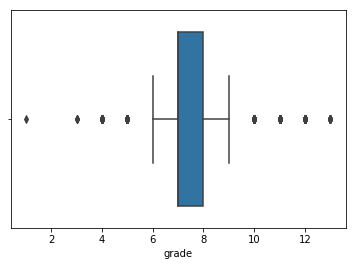

In [0]:
sns.boxplot(df['grade'])

In [0]:
ser2, bins2 = pd.qcut(df['grade'], q = 3, labels = 'low average high'.split(), retbins = True)
bins2

array([ 1,  7,  8, 13])

In [0]:
df = pd.concat([df,ser2], axis = 1)

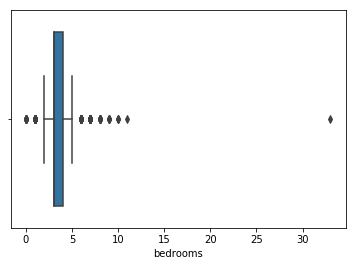

In [0]:
sns.boxplot(df['bedrooms'])

In [0]:
df[df['bedrooms']>20]

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade
15870,640000.0,33,1.75,1.0,0,0,5,7,98103,1330,3370,1,0.0,low


In [0]:
df.iloc[15870,:]['bedrooms'] = 3

In [0]:
df[df['bedrooms']>15]

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade
15870,640000.0,33,1.75,1.0,0,0,5,7,98103,1330,3370,1,0.0,low


In [0]:
df.drop(axis = 0, index = 15870, inplace = True)

In [0]:
df.reset_index(drop = True, inplace = True)

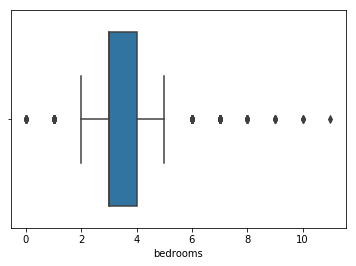

In [0]:
sns.boxplot(df['bedrooms'])

In [0]:
df['bathrooms'] = df['bathrooms'].round().astype(int)

In [0]:
df = df.drop(labels = 'bathrooms2', axis = 1)
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade
0,221900.0,3,1,1.0,0,0,3,7,98178,1340,4310,1,0.0,low
1,538000.0,3,2,2.0,0,0,3,7,98125,1690,5949,1,1.0,low
2,180000.0,2,1,1.0,0,0,3,6,98028,2720,5342,1,0.0,low
3,604000.0,4,3,1.0,0,0,5,7,98136,1360,3640,1,0.0,low
4,510000.0,3,2,1.0,0,0,3,8,98074,1800,5703,1,0.0,average


In [0]:
df['floors'] = df['floors'].round().astype(int)

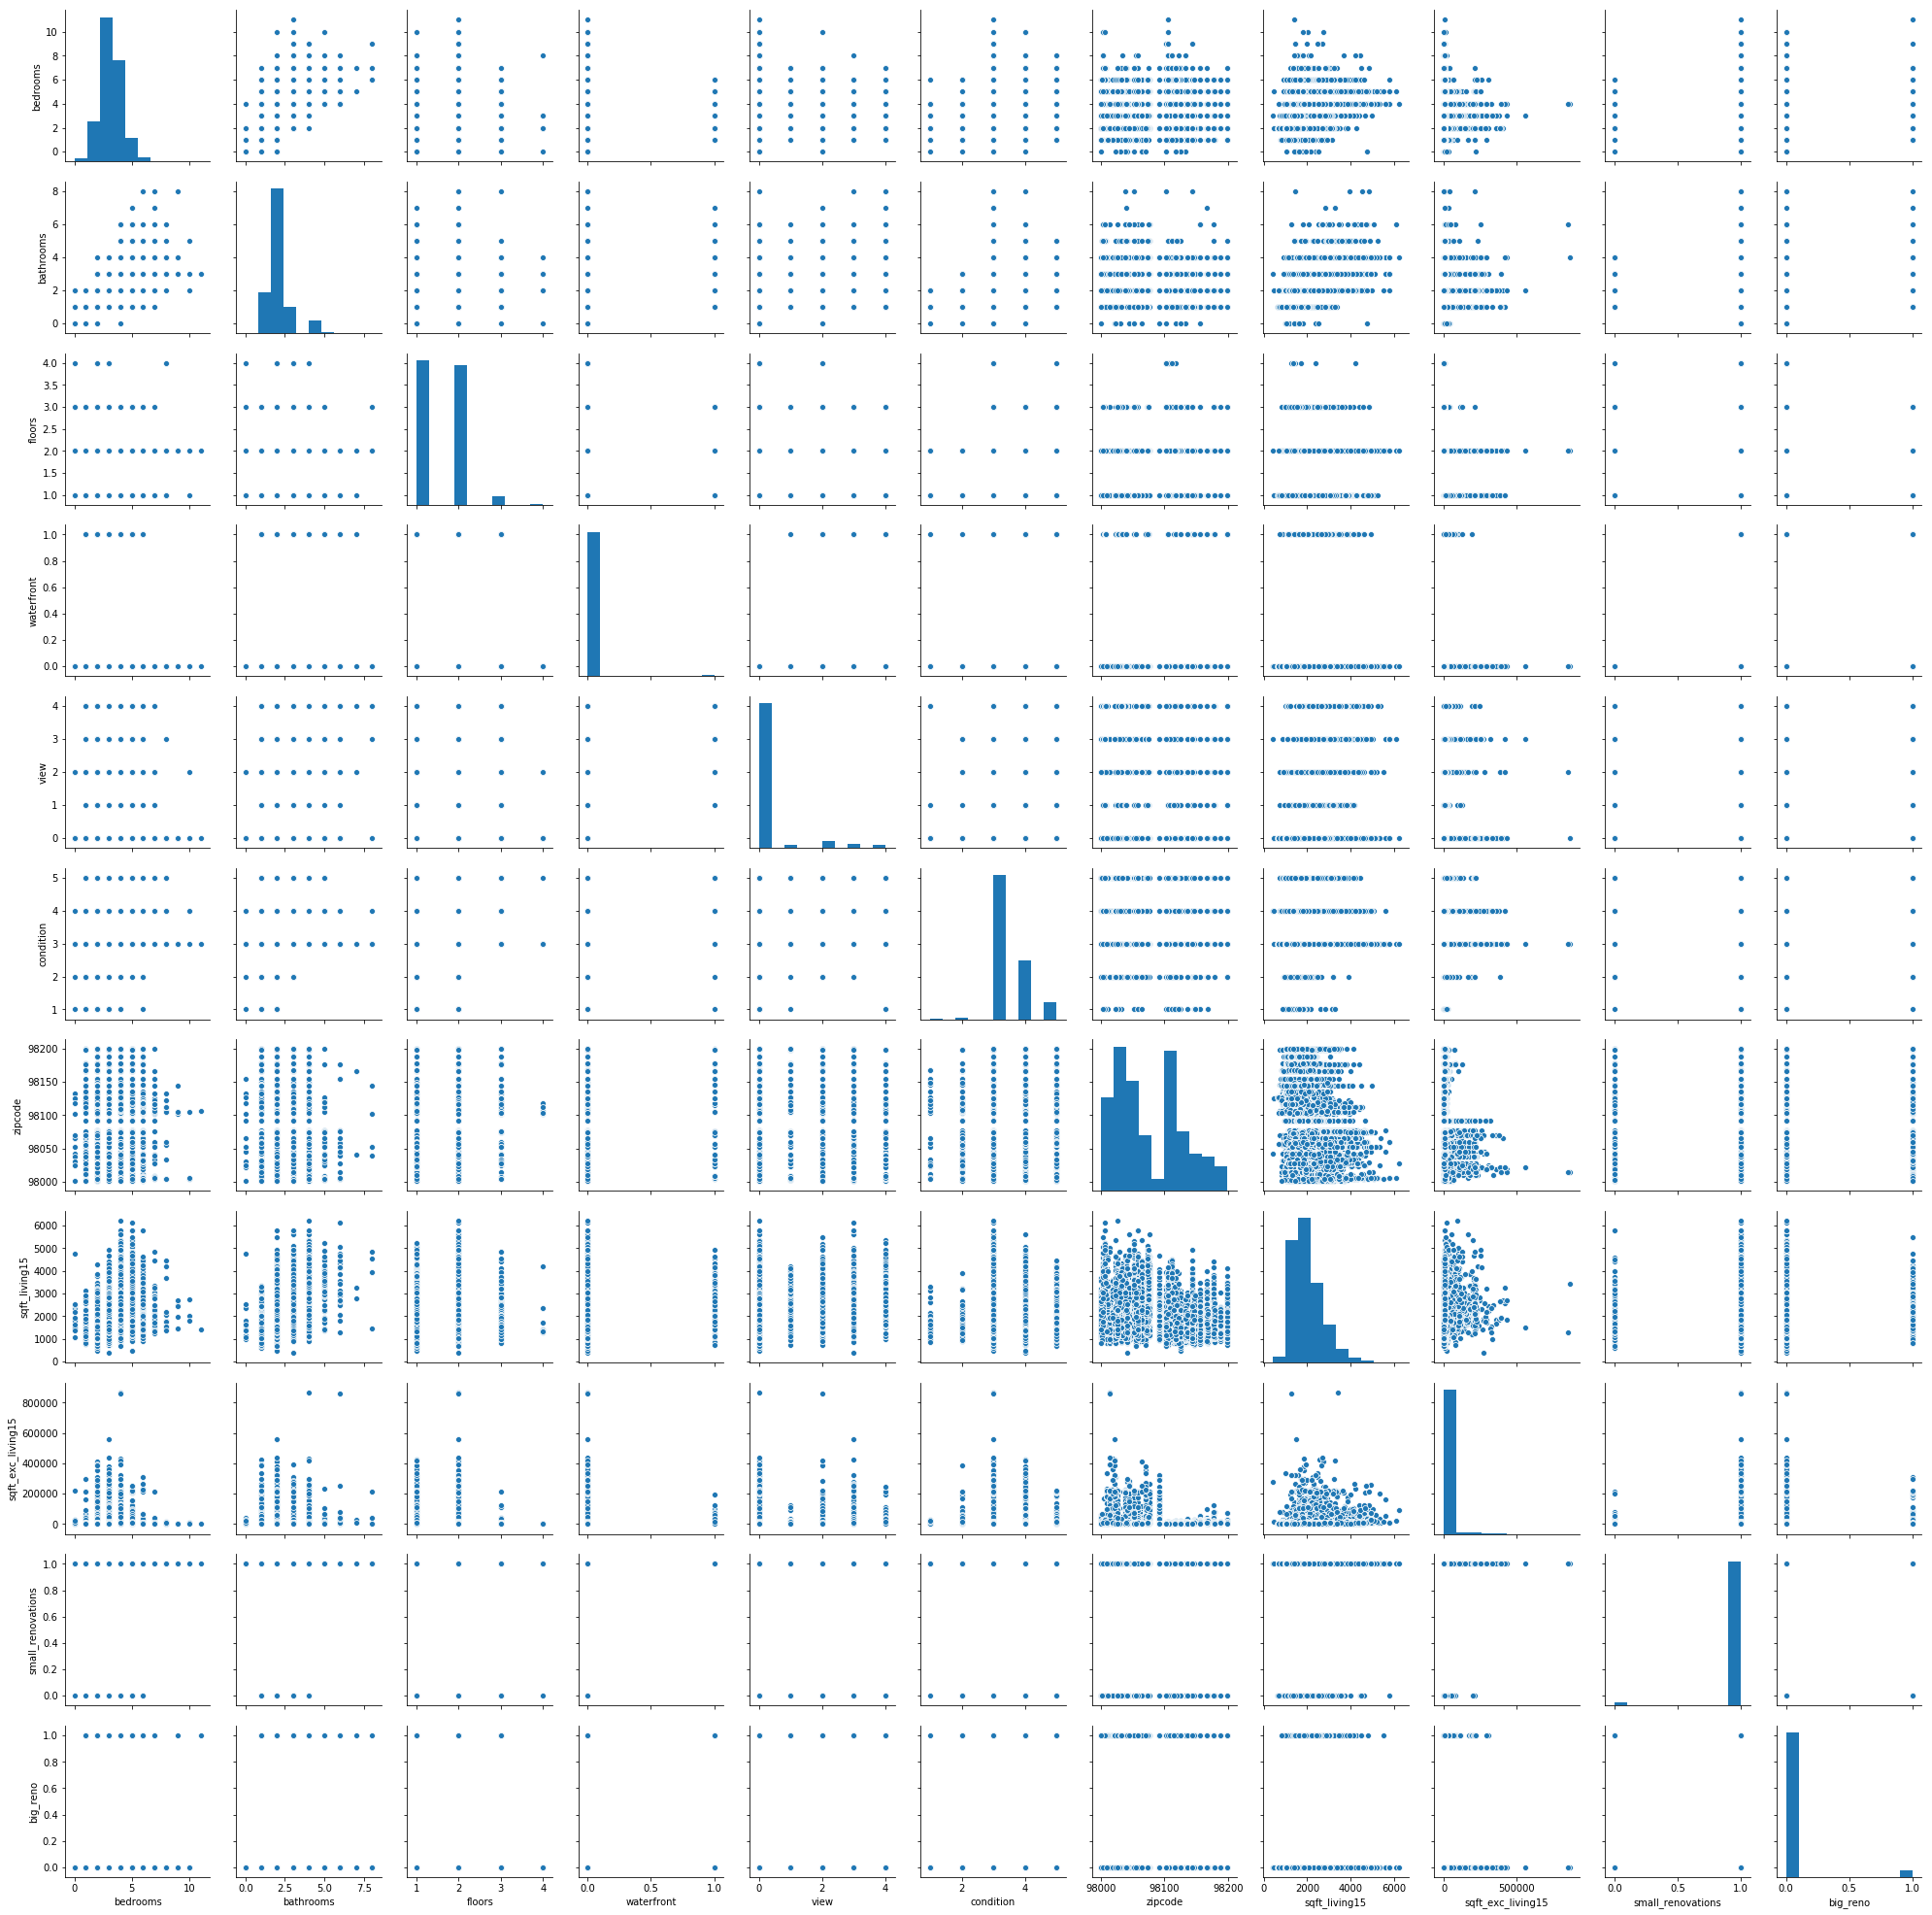

In [0]:
sns.pairplot(df.drop(labels = 'price', axis = 1))

In [0]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade
0,221900.0,3,1,1,0,0,3,7,98178,1340,4310,1,0.0,low
1,538000.0,3,2,2,0,0,3,7,98125,1690,5949,1,1.0,low
2,180000.0,2,1,1,0,0,3,6,98028,2720,5342,1,0.0,low
3,604000.0,4,3,1,0,0,5,7,98136,1360,3640,1,0.0,low
4,510000.0,3,2,1,0,0,3,8,98074,1800,5703,1,0.0,average


In [0]:
df['big_reno'] = df['big_reno'].astype(int)

In [0]:
oe2 = OrdinalEncoder()

In [0]:
df['zipcode'] = oe.fit_transform(df[['zipcode']])

In [0]:
df['zipcode'] = oe.inverse_transform(df[['zipcode']])

In [0]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade
0,221900.0,3,1,1,0,0,3,7,98178,1340,4310,1,0,low
1,538000.0,3,2,2,0,0,3,7,98125,1690,5949,1,1,low
2,180000.0,2,1,1,0,0,3,6,98028,2720,5342,1,0,low
3,604000.0,4,3,1,0,0,5,7,98136,1360,3640,1,0,low
4,510000.0,3,2,1,0,0,3,8,98074,1800,5703,1,0,average


In [0]:
df2 = pd.get_dummies(data = df, prefix_sep = '|', drop_first = False, columns = ['grade', 'zipcode'])

df2.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade|1,grade|3,grade|4,grade|5,grade|6,grade|7,grade|8,grade|9,grade|10,grade|11,grade|12,grade|13,grade|low,grade|average,grade|high,zipcode|98001,zipcode|98002,zipcode|98003,zipcode|98004,zipcode|98005,zipcode|98006,zipcode|98007,zipcode|98008,zipcode|98010,zipcode|98011,zipcode|98014,zipcode|98019,zipcode|98022,zipcode|98023,...,zipcode|98055,zipcode|98056,zipcode|98058,zipcode|98059,zipcode|98065,zipcode|98070,zipcode|98072,zipcode|98074,zipcode|98075,zipcode|98077,zipcode|98092,zipcode|98102,zipcode|98103,zipcode|98105,zipcode|98106,zipcode|98107,zipcode|98108,zipcode|98109,zipcode|98112,zipcode|98115,zipcode|98116,zipcode|98117,zipcode|98118,zipcode|98119,zipcode|98122,zipcode|98125,zipcode|98126,zipcode|98133,zipcode|98136,zipcode|98144,zipcode|98146,zipcode|98148,zipcode|98155,zipcode|98166,zipcode|98168,zipcode|98177,zipcode|98178,zipcode|98188,zipcode|98198,zipcode|98199
0,221900.0,3,1,1,0,0,3,1340,4310,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2,2,0,0,3,1690,5949,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1,1,0,0,3,2720,5342,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3,1,0,0,5,1360,3640,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2,1,0,0,3,1800,5703,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
ssx = StandardScaler()
mmx = MinMaxScaler()

In [0]:
x = df2.drop(labels = 'price', axis = 1)
y = df2['price']

In [0]:
x_scaled = ssx.fit_transform(x)
pd.DataFrame(x_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,-0.406924,-1.401302,-0.964399,-0.087175,-0.305767,-0.629146,-0.943398,-0.238065,0.157016,-0.21014,-0.006802,-0.011783,-0.036656,-0.106416,-0.322673,1.186036,-0.624801,-0.371017,-0.235322,-0.137147,-0.064667,-0.024533,0.955904,-0.624801,-0.494832,-0.130519,-0.096402,-0.114568,-0.122009,-0.088512,-0.153578,-0.081037,-0.115188,-0.06818,-0.09542,-0.075965,-0.094177,-0.104622,-0.153736,-0.061335,...,-0.112055,-0.138367,-0.146649,-0.148775,-0.120634,-0.074094,-0.113108,-0.144327,-0.129968,-0.096158,-0.128488,-0.069872,-0.169127,-0.103486,-0.125478,-0.11163,-0.093172,-0.071197,-0.112266,-0.166504,-0.124523,-0.162048,-0.155149,-0.092666,-0.116623,-0.139060,-0.129045,-0.152946,-0.110991,-0.126991,-0.116215,-0.051424,-0.14516,-0.109053,-0.112266,-0.10927,9.027101,-0.079578,-0.114568,-0.122009
1,-0.406924,-0.077717,0.838281,-0.087175,-0.305767,-0.629146,-0.432730,-0.177778,0.157016,4.75873,-0.006802,-0.011783,-0.036656,-0.106416,-0.322673,1.186036,-0.624801,-0.371017,-0.235322,-0.137147,-0.064667,-0.024533,0.955904,-0.624801,-0.494832,-0.130519,-0.096402,-0.114568,-0.122009,-0.088512,-0.153578,-0.081037,-0.115188,-0.06818,-0.09542,-0.075965,-0.094177,-0.104622,-0.153736,-0.061335,...,-0.112055,-0.138367,-0.146649,-0.148775,-0.120634,-0.074094,-0.113108,-0.144327,-0.129968,-0.096158,-0.128488,-0.069872,-0.169127,-0.103486,-0.125478,-0.11163,-0.093172,-0.071197,-0.112266,-0.166504,-0.124523,-0.162048,-0.155149,-0.092666,-0.116623,7.191119,-0.129045,-0.152946,-0.110991,-0.126991,-0.116215,-0.051424,-0.14516,-0.109053,-0.112266,-0.10927,-0.110778,-0.079578,-0.114568,-0.122009
2,-1.508293,-1.401302,-0.964399,-0.087175,-0.305767,-0.629146,1.070093,-0.200105,0.157016,-0.21014,-0.006802,-0.011783,-0.036656,-0.106416,3.099115,-0.843145,-0.624801,-0.371017,-0.235322,-0.137147,-0.064667,-0.024533,0.955904,-0.624801,-0.494832,-0.130519,-0.096402,-0.114568,-0.122009,-0.088512,-0.153578,-0.081037,-0.115188,-0.06818,-0.09542,-0.075965,-0.094177,-0.104622,-0.153736,-0.061335,...,-0.112055,-0.138367,-0.146649,-0.148775,-0.120634,-0.074094,-0.113108,-0.144327,-0.129968,-0.096158,-0.128488,-0.069872,-0.169127,-0.103486,-0.125478,-0.11163,-0.093172,-0.071197,-0.112266,-0.166504,-0.124523,-0.162048,-0.155149,-0.092666,-0.116623,-0.139060,-0.129045,-0.152946,-0.110991,-0.126991,-0.116215,-0.051424,-0.14516,-0.109053,-0.112266,-0.10927,-0.110778,-0.079578,-0.114568,-0.122009
3,0.694446,1.245867,-0.964399,-0.087175,-0.305767,2.444688,-0.914217,-0.262709,0.157016,-0.21014,-0.006802,-0.011783,-0.036656,-0.106416,-0.322673,1.186036,-0.624801,-0.371017,-0.235322,-0.137147,-0.064667,-0.024533,0.955904,-0.624801,-0.494832,-0.130519,-0.096402,-0.114568,-0.122009,-0.088512,-0.153578,-0.081037,-0.115188,-0.06818,-0.09542,-0.075965,-0.094177,-0.104622,-0.153736,-0.061335,...,-0.112055,-0.138367,-0.146649,-0.148775,-0.120634,-0.074094,-0.113108,-0.144327,-0.129968,-0.096158,-0.128488,-0.069872,-0.169127,-0.103486,-0.125478,-0.11163,-0.093172,-0.071197,-0.112266,-0.166504,-0.124523,-0.162048,-0.155149,-0.092666,-0.116623,-0.139060,-0.129045,-0.152946,9.009712,-0.126991,-0.116215,-0.051424,-0.14516,-0.109053,-0.112266,-0.10927,-0.110778,-0.079578,-0.114568,-0.122009
4,-0.406924,-0.077717,-0.964399,-0.087175,-0.305767,-0.629146,-0.272234,-0.186827,0.157016,-0.21014,-0.006802,-0.011783,-0.036656,-0.106416,-0.322673,-0.843145,1.600511,-0.371017,-0.235322,-0.137147,-0.064667,-0.024533,-1.046130,1.600511,-0.494832,-0.130519,-0.096402,-0.114568,-0.122009,-0.088512,-0.153578,-0.081037,-0.115188,-0.06818,-0.09542,-0.075965,-0.094177,-0.104622,-0.153736,-0.061335,...,-0.112055,-0.138367,-0.146649,-0.148775,-0.120634,-0.074094,-0.113108,6.928694,-0.129968,-0.096158,-0.128488,-0.069872,-0.169127,-0.103486,-0.125478,-0.11163,-0.093172,-0.071197,-0.11226

In [0]:
x_minmaxed = mmx.fit_transform(x)
y_mmx = y.values

In [0]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm

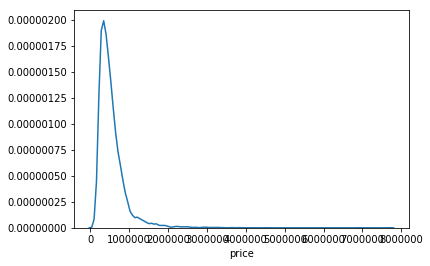

In [0]:
sns.distplot(df['price'], hist = False)

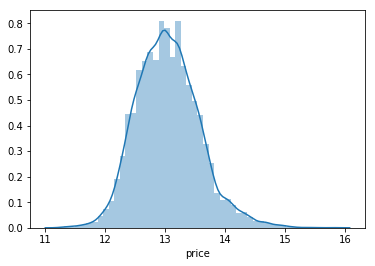

In [0]:
sns.distplot(np.log(df['price']))

In [0]:
df2['price'] = np.log(df['price'])

In [0]:
df2.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_living15,sqft_exc_living15,small_renovations,big_reno,grade|1,grade|3,grade|4,grade|5,grade|6,grade|7,grade|8,grade|9,grade|10,grade|11,grade|12,grade|13,grade|low,grade|average,grade|high,zipcode|98001,zipcode|98002,zipcode|98003,zipcode|98004,zipcode|98005,zipcode|98006,zipcode|98007,zipcode|98008,zipcode|98010,zipcode|98011,zipcode|98014,zipcode|98019,zipcode|98022,zipcode|98023,...,zipcode|98055,zipcode|98056,zipcode|98058,zipcode|98059,zipcode|98065,zipcode|98070,zipcode|98072,zipcode|98074,zipcode|98075,zipcode|98077,zipcode|98092,zipcode|98102,zipcode|98103,zipcode|98105,zipcode|98106,zipcode|98107,zipcode|98108,zipcode|98109,zipcode|98112,zipcode|98115,zipcode|98116,zipcode|98117,zipcode|98118,zipcode|98119,zipcode|98122,zipcode|98125,zipcode|98126,zipcode|98133,zipcode|98136,zipcode|98144,zipcode|98146,zipcode|98148,zipcode|98155,zipcode|98166,zipcode|98168,zipcode|98177,zipcode|98178,zipcode|98188,zipcode|98198,zipcode|98199
0,2.510410,3,1,1,0,0,3,1340,4310,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2.579884,3,2,2,0,0,3,1690,5949,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.493264,2,1,1,0,0,3,2720,5342,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.588616,4,3,1,0,0,5,1360,3640,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.575826,3,2,1,0,0,3,1800,5703,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = mmx.fit_transform(df2.drop('price', 1))
y = df2['price'].values

In [0]:
ones = np.ones((len(df2), 1))

x = np.append(arr = ones, values = x, axis = 1)

In [0]:
x[:5,:5]

array([[1.        , 1.        , 0.27272727, 0.125     , 0.        ],
       [1.        , 1.        , 0.27272727, 0.25      , 0.33333333],
       [1.        , 1.        , 0.18181818, 0.125     , 0.        ],
       [1.        , 1.        , 0.36363636, 0.375     , 0.        ],
       [1.        , 1.        , 0.27272727, 0.25      , 0.        ]])

In [0]:
x = np.delete(x,0,axis = 1)

In [0]:
x.shape[1]

96

In [0]:
to_pop = list(range(x.shape[1]))

In [0]:
to_pop

In [0]:
x[:,to_pop]

array([[1.        , 0.27272727, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.27272727, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18181818, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.18181818, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.27272727, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18181818, 0.125     , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
to_pop.pop(57)
x_ols = x[:,to_pop]

ols_model = sm.OLS(endog = y, exog = x_ols)
ols_model = ols_model.fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1397.
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        05:31:53   Log-Likelihood:                 59308.
No. Observations:               21612   AIC:                        -1.184e+05
Df Residuals:                   21524   BIC:                        -1.177e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7077      0.001   1499.689      0.0

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [0]:
lm = LinearRegression()

In [0]:
x_train, x_test, y_train, y_test = tts(x_ols, y, test_size = .28, random_state = 42)

In [0]:
lm.fit(x_train,y_train)
lm_pred = lm.predict(x_test)

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

In [0]:
lm_mae = mae(y_test,lm_pred)
lm_mse = mse(y_test, lm_pred)
lm_r2 = r2_score(y_test, lm_pred)

print('----- Simple Linear ----- ','\n','\n',
    'Mean Absolute Error: ', lm_mae.round(2), '\n',
     'Mean Squared Error: ', lm_mse.round(2), '\n',
     'Accuracy (r-squared): ', lm_r2.round(2))

----- Simple Linear -----  
 
 Mean Absolute Error:  0.01 
 Mean Squared Error:  0.0 
 Accuracy (r-squared):  0.85


In [0]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

ridge_pred = ridge_model.predict(x_test)

ridge_mae = mae(y_test, ridge_pred)
ridge_mse = mse(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print('-----------Ridge---------','\n','\n',
    'Mean Absolute Error: ', ridge_mae,'\n',
     'Mean Squared Error: ', ridge_mse,'\n',
     'Accuracy (r-squared): ', ridge_r2)

-----------Ridge--------- 
 
 Mean Absolute Error:  0.011753064055018917 
 Mean Squared Error:  0.00025282033350979395 
 Accuracy (r-squared):  0.8452664132693479


In [0]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

lasso_pred = lasso_model.predict(x_test)
lasso_mae = mae(y_test,lasso_pred)
lasso_mse = mse(y_test,lasso_pred)
lasso_r2 = r2_score(y_test,lasso_pred)

print('-----------Lasso---------','\n','\n',
    'Mean Absolute Error: ', lasso_mae,'\n',
     'Mean Squared Error: ', lasso_mse,'\n',
     'Accuracy (r-squared): ', lasso_r2)

-----------Lasso--------- 
 
 Mean Absolute Error:  0.03196810183143432 
 Mean Squared Error:  0.0016339197635152375 
 Accuracy (r-squared):  -7.641509647715594e-06


In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [0]:
model = Sequential()
model.add(Dense(48, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1model.pr, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                4464      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 5,849
Trainable params: 5,849
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

dnn_pred = model.predict(x_test)

W0819 06:00:30.266338 140249371527040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:

dnn_mae = mae(y_test,dnn_pred)
dnn_mse = mse(y_test,dnn_pred)
dnn_r2 = r2_score(y_test,dnn_pred)

print('-----------Lasso---------','\n','\n',
    'Mean Absolute Error: ', dnn_mae,'\n',
     'Mean Squared Error: ', dnn_mse,'\n',
     'Accuracy (r-squared): ', dnn_r2)

NameError: ignored